## Call Libraries

In [42]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For Displaying outputs of all commands from a cell and not just for the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings   # Import warnings module
# To do not print warnings on screen
warnings.filterwarnings("ignore")

import zipfile # To help read zip file
from sklearn.compose import ColumnTransformer

# For splitting dataset into training and testing data
from sklearn.model_selection import train_test_split


# Transformers :
# Class for imputing missing values
from sklearn.impute import SimpleImputer

# One hot encoder for categorical data
from sklearn.preprocessing import OneHotEncoder as onehot

# For Scaling numeric data
from sklearn.preprocessing import StandardScaler as ss

# Label encoder for transforming target column
from sklearn.preprocessing import LabelEncoder

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Estimator
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import set_config
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
#from skopt import BayesSearchCV 
#from skopt.space import Real, Categorical, Integer

## Read Data

In [2]:
# read the dataset using the compression zip
df=pd.read_csv("Book1.csv")

In [3]:
df.head()

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode,resp
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,...,0,1,0,0,1,1,0,0,1,0
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,...,0,1,0,0,1,0,0,0,2,0
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,...,0,1,0,0,1,1,0,0,3,0
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,...,1,1,0,0,1,1,0,0,4,0
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,...,1,1,0,0,1,1,0,0,5,0


In [4]:
#Checkin the size of data
df.size

777504

## Data Exploration

In [5]:
#Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      29904 non-null  int64  
 1   CRED     29871 non-null  float64
 2   MS       29904 non-null  object 
 3   HEQ      29904 non-null  float64
 4   INCOME   29904 non-null  int64  
 5   DEPC     29904 non-null  object 
 6   MOB      29904 non-null  object 
 7   MILEAGE  29904 non-null  float64
 8   RESTYPE  29904 non-null  object 
 9   GENDER   29904 non-null  object 
 10  EMP_STA  29904 non-null  int64  
 11  RES_STA  29904 non-null  int64  
 12  DELINQ   29904 non-null  int64  
 13  NUMTR    29904 non-null  int64  
 14  MRTGI    29904 non-null  object 
 15  MFDU     29904 non-null  int64  
 16  female   29904 non-null  int64  
 17  HOME     29904 non-null  int64  
 18  CONDO    29904 non-null  int64  
 19  COOP     29904 non-null  int64  
 20  renter   29904 non-null  int64  
 21  emp1     299

In [6]:
#Checkin the dtypes
df.dtypes

AGE          int64
CRED       float64
MS          object
HEQ        float64
INCOME       int64
DEPC        object
MOB         object
MILEAGE    float64
RESTYPE     object
GENDER      object
EMP_STA      int64
RES_STA      int64
DELINQ       int64
NUMTR        int64
MRTGI       object
MFDU         int64
female       int64
HOME         int64
CONDO        int64
COOP         int64
renter       int64
emp1         int64
emp2         int64
msn          int64
cuscode      int64
resp         int64
dtype: object

In [7]:
#chekcing the number of rows and columns in the dataset
df.shape

(29904, 26)

In [8]:
# To drop ID column as it is not required in modeling or even Data exploration
df.drop("cuscode", axis=1, inplace=True)

In [9]:
#To print number of null values in each column/feature
df.isnull().sum()

AGE         0
CRED       33
MS          0
HEQ         0
INCOME      0
DEPC        0
MOB         0
MILEAGE     0
RESTYPE     0
GENDER      0
EMP_STA     0
RES_STA     0
DELINQ      0
NUMTR       0
MRTGI       0
MFDU        0
female      0
HOME        0
CONDO       0
COOP        0
renter      0
emp1        0
emp2        0
msn         0
resp        0
dtype: int64

## Data Pre-Processing and Cleaning

In [10]:
count_unique_values = df.nunique().sort_values()

#find features that have constant values only
#such features do not provide any information and only make our dataset larger.
constantfeatures = [features for features in df.columns if count_unique_values[features] == 1]

print("Number of Constant features are:")
print(len(constantfeatures)) 

# Removing features with constant values
df.drop(constantfeatures, axis=1, inplace=True)

Number of Constant features are:
1


In [11]:
# Understanding which features are catagorical and which are numerical based on datatype for imputation
catagorical_features = df.select_dtypes(include=[np.object]).columns 
numerical_features = df.select_dtypes(include=[np.number]).columns

In [12]:

# Total number of categorical features in the dataset
len(catagorical_features)

6

In [13]:
# Total number of numerical features in the dataset
len(numerical_features)

18

In [14]:
#To print unique values of catagorical featured (object data type)
for feature in catagorical_features:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('Number of Unique values:',df[feature].nunique())
    print('Unique Values:',df[feature].unique())


 
************* Column name: MS *************
Number of Unique values: 3
Unique Values: ['U' 'X' 'M']

 
************* Column name: DEPC *************
Number of Unique values: 2
Unique Values: ['N' 'Y']

 
************* Column name: MOB *************
Number of Unique values: 2
Unique Values: ['Y' 'N']

 
************* Column name: RESTYPE *************
Number of Unique values: 4
Unique Values: ['HOME' 'RENTER' 'CONDO' 'COOP']

 
************* Column name: GENDER *************
Number of Unique values: 2
Unique Values: ['M' 'F']

 
************* Column name: MRTGI *************
Number of Unique values: 3
Unique Values: ['N' 'Y' 'U']


In [15]:
# missing values in %
percent_miss = 100* df.isnull().sum()/len(df)
percent_miss

AGE        0.000000
CRED       0.110353
MS         0.000000
HEQ        0.000000
INCOME     0.000000
DEPC       0.000000
MOB        0.000000
MILEAGE    0.000000
RESTYPE    0.000000
GENDER     0.000000
EMP_STA    0.000000
RES_STA    0.000000
DELINQ     0.000000
NUMTR      0.000000
MRTGI      0.000000
MFDU       0.000000
female     0.000000
HOME       0.000000
CONDO      0.000000
COOP       0.000000
emp1       0.000000
emp2       0.000000
msn        0.000000
resp       0.000000
dtype: float64

In [16]:
# Calculating how many features have more than 50% of data missing in them
np.sum(percent_miss > 50)

0

In [17]:
# Remove these 24 features,as these have more than 50% data missing
missing = [feature for feature in df.columns if percent_miss[feature] > 50]
df.drop(missing, axis=1, inplace=True)

In [18]:
# The updated data structure
df.shape

(29904, 24)

In [19]:
remove_missing_features = [feature for feature in df.columns if percent_miss[feature] < 0.5]
fill_missing_features = [feature for feature in df.columns if percent_miss[feature] > 0.5] 

In [20]:
# filling in the missing data for features containing many of them
for col in fill_missing_features:
    if col in catagorical_features:
        # For catagorical feature fill missing data with mode
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df[col].fillna(df[col].mean(), inplace=True)

# removing rows with less than 0.5% missing data in them (only a few examples will be deleted )
df.dropna(axis=0, inplace=True)

In [21]:
df.shape

(29871, 24)

In [22]:
df.isnull().sum()

AGE        0
CRED       0
MS         0
HEQ        0
INCOME     0
DEPC       0
MOB        0
MILEAGE    0
RESTYPE    0
GENDER     0
EMP_STA    0
RES_STA    0
DELINQ     0
NUMTR      0
MRTGI      0
MFDU       0
female     0
HOME       0
CONDO      0
COOP       0
emp1       0
emp2       0
msn        0
resp       0
dtype: int64

In [23]:
# Check for any duplicate columns created
df.columns.duplicated().sum()

0

In [24]:
corr=df.corr()
corr['resp'].sort_values(ascending=False).head(10)

resp       1.000000
NUMTR      0.096309
MFDU       0.080543
DELINQ     0.020370
MILEAGE    0.019328
emp1       0.012892
COOP       0.011050
msn        0.009094
EMP_STA    0.004436
CONDO      0.000722
Name: resp, dtype: float64

<Figure size 1800x1296 with 0 Axes>

Text(0.5, 1.0, 'Pearson correlation')

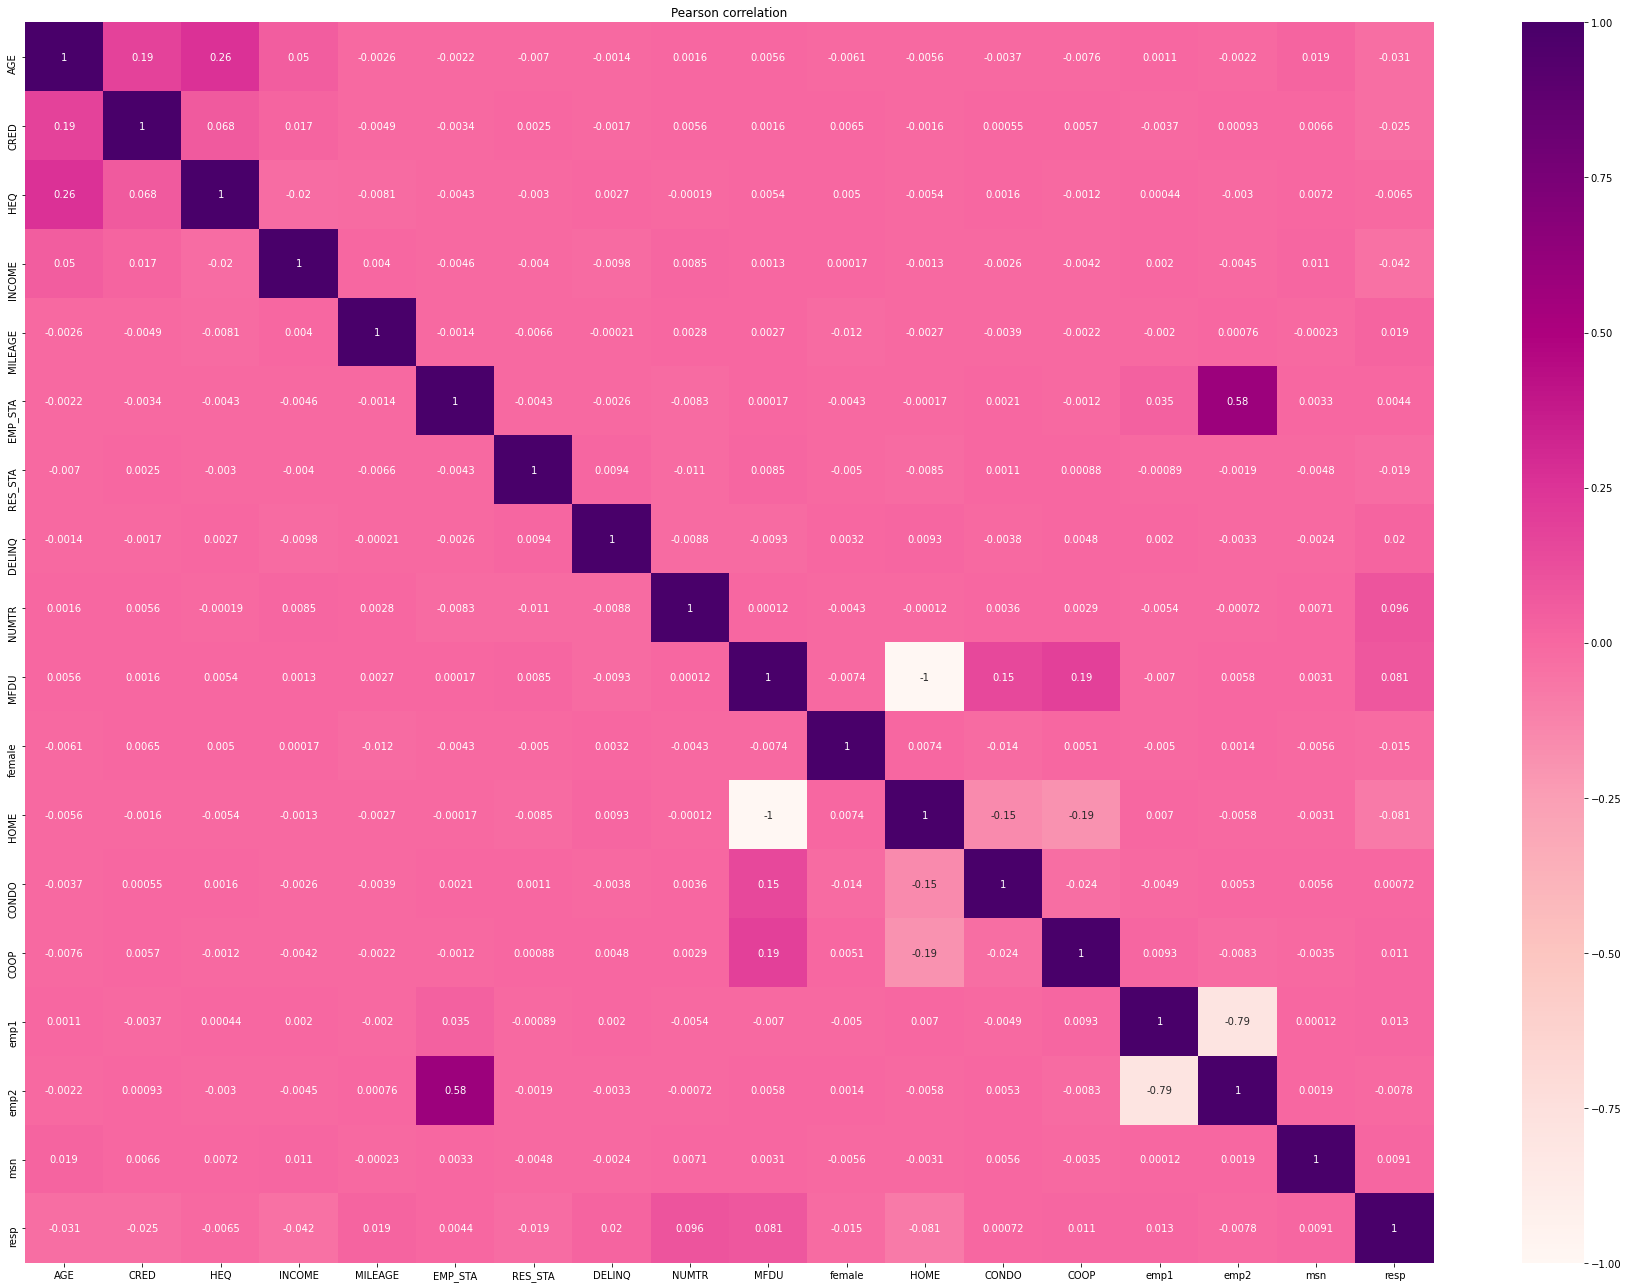

In [25]:
#CORRELATION
plt.figure(figsize=(25,18))
_=sns.heatmap(df.corr('pearson'),annot=True,cmap='RdPu');
plt.title('Pearson correlation')
plt.tight_layout()

In [26]:
def plots(p,predict,train,xlabel):
    plt.plot(p,predict,'g')
    plt.plot(p,train,'b')
    plt.title('Variation of Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend(('Test','Train'))

In [27]:
print(round(df.resp.value_counts() *100/ df.resp.count(),2))

0    90.44
1     9.56
Name: resp, dtype: float64


In [28]:
cat_col = df.select_dtypes(include=[np.object]).columns
num_col = ['AGE','CRED','HEQ','INCOME','MILEAGE','EMP_STA','RES_STA','DELINQ','NUMTR','MFDU','female','HOME','CONDO','COOP','emp1','emp2','msn']

In [29]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss',ss() )])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', onehot())])

In [30]:
# Test each pipe
nc_pipe.fit_transform(df[num_col])
cat_pipe.fit_transform(df[cat_col])

array([[-1.88476863, -0.61779541, -1.02732369, ...,  0.31893953,
        -0.25247608, -1.1646092 ],
       [-2.01341168, -1.61641956, -1.02732369, ..., -3.13539063,
        -0.25247608, -1.1646092 ],
       [-1.94909015, -1.8406005 , -1.02732369, ...,  0.31893953,
        -0.25247608, -1.1646092 ],
       ...,
       [ 0.94537849, 12.07899739, -0.22393766, ...,  0.31893953,
        -0.25247608,  0.85865714],
       [ 0.94537849, 12.07899739, -0.22393766, ...,  0.31893953,
        -0.25247608,  0.85865714],
       [ 1.20266459, 12.07899739,  1.3882082 , ...,  0.31893953,
        -0.25247608,  0.85865714]])

<29871x16 sparse matrix of type '<class 'numpy.float64'>'
	with 179226 stored elements in Compressed Sparse Row format>

In [31]:
 #Now put the two pipes within one column-transformer
ct = ColumnTransformer(
                        [
                        ('nc_pipe',nc_pipe,num_col), 
                        ('cat_pipe',cat_pipe,cat_col)
                        ]
                       )

In [32]:
# Test this column transformer pipe
ct.fit_transform(df)

array([[-1.88476863, -0.61779541, -1.02732369, ...,  1.        ,
         0.        ,  0.        ],
       [-2.01341168, -1.61641956, -1.02732369, ...,  0.        ,
         0.        ,  1.        ],
       [-1.94909015, -1.8406005 , -1.02732369, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.94537849, 12.07899739, -0.22393766, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.94537849, 12.07899739, -0.22393766, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.20266459, 12.07899739,  1.3882082 , ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
# Final pipe to bring in the column-transformer followed by estimator
pt = Pipeline([ 
                ('ct',ct), 
                ('classifier', DecisionTreeClassifier())])

In [34]:
# Your train data
y_train = df.resp
X_train = df.drop('resp', axis=1)


In [35]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: resp, dtype: int64

In [36]:
X_train

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,NUMTR,MRTGI,MFDU,female,HOME,CONDO,COOP,emp1,emp2,msn
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,...,2,N,0,0,1,0,0,1,0,0
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,...,2,Y,0,0,1,0,0,0,0,0
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,...,0,Y,0,0,1,0,0,1,0,0
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,...,0,Y,0,1,1,0,0,1,0,0
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,...,0,Y,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,56,1789.0,M,30.0,30,Y,Y,17.302,COOP,F,...,0,Y,1,1,0,0,1,1,0,1
29900,58,1789.0,U,30.0,40,Y,N,10.509,HOME,M,...,0,Y,0,0,1,0,0,1,0,0
29901,64,1789.0,M,30.0,40,Y,N,4.749,RENTER,F,...,3,N,1,1,0,0,0,1,0,1
29902,64,1789.0,M,30.0,40,Y,Y,11.110,HOME,F,...,0,Y,0,1,1,0,0,1,0,1


In [37]:
# Fit final pipe on the data
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['AGE', 'CRED', 'HEQ',
                                                   'INCOME', 'MILEAGE',
                                                   'EMP_STA', 'RES_STA',
                                                   'DELINQ', 'NUMTR', 'MFDU',
                                                   'female', 'HOME', 'CONDO',
                                                   'COOP', 'emp1', 'emp2',
                                                   'msn']),
                                                 ('cat_pipe',
     

In [38]:
df.head()

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,MRTGI,MFDU,female,HOME,CONDO,COOP,emp1,emp2,msn,resp
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,...,N,0,0,1,0,0,1,0,0,0
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,...,Y,0,0,1,0,0,0,0,0,0
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,...,Y,0,0,1,0,0,1,0,0,0
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,...,Y,0,1,1,0,0,1,0,0,0
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,...,Y,0,1,1,0,0,1,0,0,0


In [40]:
# Make predictions
pt.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['AGE', 'CRED', 'HEQ',
                                                   'INCOME', 'MILEAGE',
                                                   'EMP_STA', 'RES_STA',
                                                   'DELINQ', 'NUMTR', 'MFDU',
                                                   'female', 'HOME', 'CONDO',
                                                   'COOP', 'emp1', 'emp2',
                                                   'msn']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['MS', 'DEPC', 'MOB', 'RESTYPE', 'GENDER', 'MRTGI'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [39]:
# splitting the data into train and test
X_train,X_test, y_train, y_test = train_test_split(
                                                    X_c,                   # Data features
                                                    y_c,                   # Target column
                                                    test_size = 0.35,     # split-ratio
                                                    shuffle=True    
                                                    )

NameError: name 'X_c' is not defined

In [ ]:
# Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)
             ( [ ("le",LabelEncoder), ("ohe", OneHotEncoder)])
                                                                  # Specify other parameters here
            )
            ]

# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)


In [ ]:
# 6.2 What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()

In [ ]:
pip install scikit-optimize

# Cross Validation


In [ ]:
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.15 Set option to dislay many rows
pd.set_option('display.max_columns', 100)

# Hyperparameter tuning both using Grid Search and Randomized Search

In [ ]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()

In [ ]:
# 6.3 Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2

In [ ]:
# 6.3.1 Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [25,30],
               }                               # Total: 2 * 2 * 2 * 2

In [ ]:
# 7  Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified

#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [ ]:
#Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 